In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [2]:
#read the dataset
data = 'avocado-updated-2020.csv'
#df = pd.read_csv(data, index_col = 'geography')
df = pd.read_csv(data)
df.head(15)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington
5,1/4/2015,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
6,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
7,1/4/2015,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
8,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,1/4/2015,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston


In [4]:
#df[df.eq(var1).any(1)]

In [5]:
df["date"] = df["date"].map(pd.to_datetime)
df["date"][0]

Timestamp('2015-01-04 00:00:00')

In [6]:
import datetime
df["date"] = df["date"].map(lambda x: (x-datetime.datetime(1970,1,1)).total_seconds())
df["date"]

0        1.420330e+09
1        1.420330e+09
2        1.420330e+09
3        1.420330e+09
4        1.420330e+09
             ...     
30016    1.589674e+09
30017    1.589674e+09
30018    1.589674e+09
30019    1.589674e+09
30020    1.589674e+09
Name: date, Length: 30021, dtype: float64

In [7]:
# Change the 'type' column from words to numbers for the ml model
df.type.map(dict(conventional=1, organic=0))
df = df.replace(to_replace="conventional", value="1")
df = df.replace(to_replace="organic", value="0")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,1,2015,Albany
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,0,2015,Albany
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,2015,Atlanta
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,2015,Atlanta
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,1,2015,Baltimore/Washington


In [8]:
df['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  float64
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 3.0+ MB


In [10]:
# Change the 'date' column dtype from an pbject to a float for the ml model
#df['date'].astype(float)
#df.info

In [11]:
# Determine number of rows and columns
df.shape

(30021, 13)

In [12]:
#Determine if there is duplicated data
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


In [13]:
#Determine the distribution of the data in the geography column 
local_counts = df.geography.value_counts()
local_counts

Philadelphia            556
Harrisburg/Scranton     556
Syracuse                556
Baltimore/Washington    556
Chicago                 556
Phoenix/Tucson          556
Orlando                 556
Raleigh/Greensboro      556
Indianapolis            556
Grand Rapids            556
Atlanta                 556
Jacksonville            556
West                    556
Nashville               556
Miami/Ft. Lauderdale    556
Roanoke                 556
St. Louis               556
Spokane                 556
Columbus                556
Los Angeles             556
Albany                  556
New Orleans/Mobile      556
Richmond/Norfolk        556
Pittsburgh              556
Detroit                 556
Louisville              556
Cincinnati/Dayton       556
Buffalo/Rochester       556
New York                556
San Francisco           556
Total U.S.              556
California              556
Denver                  556
Sacramento              556
Southeast               556
Dallas/Ft. Worth    

In [14]:
#Determine the features of the training set by seeing the correlations to each column
df.corr()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
date,1.000000,0.016067,0.028696,0.002313,-0.020608,-0.033492,0.094575,0.075709,0.122888,0.118121,0.983096
average_price,0.016067,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460
total_volume,0.028696,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126
4046,0.002313,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287
4225,-0.020608,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295
4770,-0.033492,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676
total_bags,0.094575,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003
small_bags,0.075709,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293
large_bags,0.122888,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919
xlarge_bags,0.118121,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915


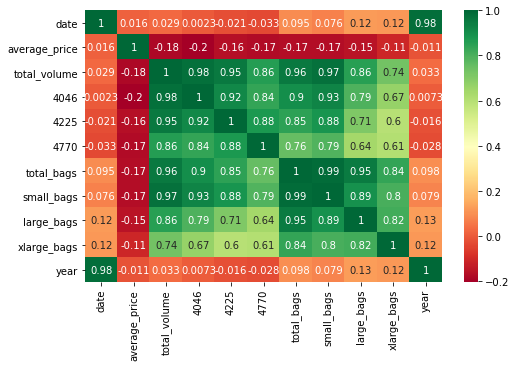

In [15]:
#Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [16]:
#From the heatmap above I can tell the date column is not needed
#del df('date')

In [17]:
#From the heatmap above I can tell the 'type' column is not included so it needs to be converted.
df.type.map(dict(conventional=1, organic=0))
df = df.replace(to_replace="conventional", value="1")
df = df.replace(to_replace="organic", value="0")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,1,2015,Albany
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,0,2015,Albany
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,2015,Atlanta
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,2015,Atlanta
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,1,2015,Baltimore/Washington


In [18]:
#Check again... the features of the training set by seeing the correlations to each column
df.corr()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
date,1.000000,0.016067,0.028696,0.002313,-0.020608,-0.033492,0.094575,0.075709,0.122888,0.118121,0.983096
average_price,0.016067,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460
total_volume,0.028696,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126
4046,0.002313,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287
4225,-0.020608,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295
4770,-0.033492,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676
total_bags,0.094575,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003
small_bags,0.075709,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293
large_bags,0.122888,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919
xlarge_bags,0.118121,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915


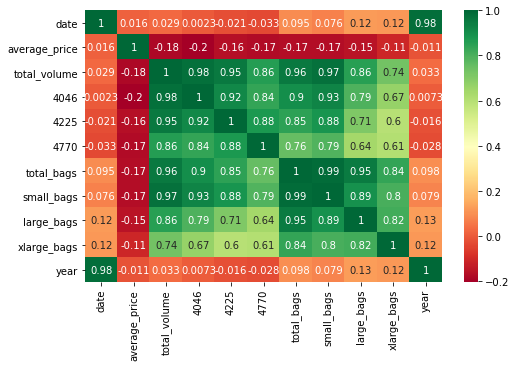

In [19]:
#Check again... Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [50]:
# Drop the geography columns that summarize the data already found in the cities...
df.drop(df.loc[df['geography']== 'California'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'South Central'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Plains'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northern New England'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Total U.S.'].index, inplace=True)
df.drop(df.loc[df['geography']== 'West'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Southeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Houston'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Tampa'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Las Vegas'].index, inplace=True)
df.head(20)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
5,1.420330e+09,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,0,2015,2
6,1.420330e+09,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,1,2015,3
7,1.420330e+09,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,0,2015,3
8,1.420330e+09,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,1,2015,4
9,1.420330e+09,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,0,2015,4


In [51]:
#train the data by putting the average_price in the y axis and all other columns in the x axis
#X=df.drop('average_price',1)
#y=df['average_price']
X=df.drop('geography',1)
y=df['geography']

In [52]:
# print the shape of an 80/20 train test split over the dataset
print('shape of X and y :',X.shape,y.shape)

shape of X and y : (25017, 12) (25017,)


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
print('shape of X and y (train) :',X_train.shape,y_train.shape)
print('shape of X and y (test) :',X_test.shape,y_test.shape)

shape of X and y (train) : (20013, 12) (20013,)
shape of X and y (test) : (5004, 12) (5004,)


In [55]:
#Encode the catagorical columns for use in the ml model
le = LabelEncoder()
df['geography'] = le.fit_transform(df['geography'])

In [56]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30012,1.589674e+09,1.63,1798.00,249.00,143.00,0.00,1407.00,1111.00,295.00,0.00,0,2020,42
30013,1.589674e+09,1.12,591420.66,238039.66,16379.48,151.06,336846.03,276681.61,60134.42,30.00,1,2020,43
30014,1.589674e+09,1.19,14134.00,200.00,0.00,0.00,13933.00,13933.00,0.00,0.00,0,2020,43
30019,1.589674e+09,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,1,2020,44


In [57]:
df.geography.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [58]:
# Determine which columns ar not contributing a pattern or key for the best accuracy
scaler=VarianceThreshold(0.1)

In [59]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (20013, 12)
shape of X (test) : (5004, 12)


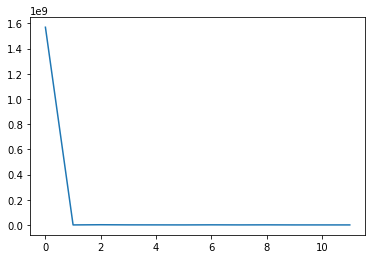

In [61]:
#Scale and Normalize the data (Check ths out)
plt.plot(X_train[0])

In [62]:
scaler=StandardScaler()

In [63]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [64]:
df_scaled = scaler.fit_transform(df)[:5]
df_scaled

array([[-1.71382682, -0.45280301, -0.47102963, -0.43018918, -0.33115323,
        -0.32481969, -0.44719067, -0.40055215, -0.4009567 , -0.16077822,
         0.99988009, -1.4044477 , -1.6939659 ],
       [-1.71382682,  1.00791263, -0.5406814 , -0.44359669, -0.46797989,
        -0.32704037, -0.48429767, -0.44581444, -0.40799557, -0.16077822,
        -1.00011993, -1.4044477 , -1.6939659 ],
       [-1.71382682, -1.01658799,  0.22399787,  1.32449786, -0.35287475,
        -0.32338448, -0.28625131, -0.35813309, -0.00777145, -0.16077822,
         0.99988009, -1.4044477 , -1.61695822],
       [-1.71382682,  0.93103286, -0.53632105, -0.43659348, -0.46416464,
        -0.32704037, -0.4832325 , -0.44632944, -0.40351806, -0.16077822,
        -1.00011993, -1.4044477 , -1.61695822],
       [-1.71382682, -0.81157527,  0.84647232, -0.18181368,  2.22031428,
         1.45284263,  0.12291899,  0.32122278, -0.35494972, -0.16077822,
         0.99988009, -1.4044477 , -1.53995053]])

In [65]:
# Verify that the mean of each column is 0 and its standard deviation is 1
print(np.mean(df_scaled[:,0]))
print(np.std(df_scaled[:,0]))

-1.713826818281013
0.0


In [66]:
# Change the dataframe into a numpy ndarray
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [67]:
#Convert the ndarray into a pandas dataframe
X_train=pd.DataFrame(X_train)
X_train.head()
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.639066,-1.172308,-0.241662,-0.420421,0.128448,-0.186241,-0.315484,-0.330782,-0.173604,-0.099382,1.000850,-1.403022
1,1.646751,0.234708,-0.536790,-0.441441,-0.464772,-0.321269,-0.478294,-0.445640,-0.393523,-0.156890,-0.999151,1.776320
2,-0.297665,-0.251352,-0.300769,-0.126963,-0.348796,-0.260807,-0.288290,-0.203528,-0.380640,-0.153658,1.000850,-0.131285
3,0.059221,0.106797,-0.495055,-0.440625,-0.465113,-0.320739,-0.376249,-0.307058,-0.406434,-0.156890,-0.999151,-0.131285
4,0.416108,-0.532755,-0.344886,-0.215288,-0.446504,0.253312,-0.281143,-0.303267,-0.124952,-0.148720,1.000850,0.504583


In [68]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [70]:
#Create a RandomForest pipeline
rf = RandomForestRegressor(random_state=0)

In [71]:
#df.dtypes

In [72]:
#df[df.eq('Houston').any(1)].count()

In [77]:
rf.fit(X_train,y_train)
y_tr1=rf.predict(X_train)
y_pr=rf.predict(X_test)

print('train data accuracy :',rf.score(X_train,y_train))
print('test data accuracy :',rf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9709416738583148
test data accuracy : 0.7949199693223579
loss of train data : 4.892785429470844
loss of test data : 34.78454110711431
